In [1]:
import pandas as pd
import icecream as ic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder




In [2]:
transit_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-05/transit_cost.csv') 


In [3]:
transit_cost.columns

Index(['e', 'country', 'city', 'line', 'start_year', 'end_year', 'rr',
       'length', 'tunnel_per', 'tunnel', 'stations', 'source1', 'cost',
       'currency', 'year', 'ppp_rate', 'real_cost', 'cost_km_millions',
       'source2', 'reference'],
      dtype='object')

## Rename columns for better understanding

In [4]:
transit_cost.rename(columns={'e':'id', 'rr':'railroad','lenght':'proposed_length','tunnel_per':'tunnel_per_complete',
                            'tunnel':'tunnel_length_complete','cost':'local_cost'}, inplace=True)

In [5]:
transit_cost.tail()

,id,country,city,line,start_year,end_year,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,source1,local_cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STD,258.744889,NaN,NaN
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIN,7.789626,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QUARTILE 1,134.863267,215.7812275,NaN
542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QUARTILE 3,241.428571,386.2857143,NaN
543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,567.000000,NaN,NaN


In [6]:
len(transit_cost)

544

In [7]:
transit_cost = transit_cost[transit_cost['country'].notna()]
transit_cost = transit_cost[transit_cost['stations'].notna()]
transit_cost = transit_cost.dropna()
transit_cost['tunnel_per_complete'] = transit_cost['tunnel_per_complete'].str.rstrip('%').astype('float') / 100.0


In [8]:
len(transit_cost)

428

In [9]:
transit_cost.describe()

,id,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,local_cost,year,ppp_rate,cost_km_millions
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02,428.000000,428.000000,428.000000
mean,7689.904206,0.063084,20.386332,0.749503,13.776791,13.644860,5.857285e+05,2014.647196,0.688043,238.422475
std,483.476286,0.243399,21.990234,0.364645,15.587418,14.053263,4.360842e+06,5.756114,0.858151,280.346544
min,7136.000000,0.000000,0.600000,0.000000,0.000000,0.000000,2.100000e+01,1991.000000,0.000120,7.790000
25%,7352.750000,0.000000,5.975000,0.527350,3.375000,4.000000,1.845000e+03,2012.000000,0.237900,133.885109
50%,7584.500000,0.000000,14.295000,1.000000,8.430000,10.000000,9.600000e+03,2016.000000,0.262150,183.845000
75%,7914.250000,0.000000,27.875000,1.000000,20.000000,20.000000,2.893925e+04,2018.000000,1.250000,243.282500
max,9510.000000,1.000000,200.000000,1.000000,160.000000,128.000000,4.800000e+07,2027.000000,5.000000,3928.571429


In [11]:
def get_railroad_sum(df, group):
    df = df.groupby(by=group, dropna=True)['railroad'].sum()
    return df

def get_total_count(df, group):
    df = df.groupby(by=group)['line'].count()
    return df

def get_unique_count(df, group):
    df = df.groupby(by=group)['line'].nunique()



# print(type(cities_count_country))
# cities_count_country.head()

In [13]:
# plt.figure(figsize=(18,18))
# plt.bar(cities_count_country['country'], cities_count_country['city'], alpha=0.5)
# plt.bar(cities_count_country['country'], cities_count_country['railroad_count'], alpha=0.5)
# plt.bar(cities_count_country['country'], cities_count_country['total_transit'], alpha=0.5)

## US Only

In [14]:
us_transit = transit_cost[transit_cost['country']=='US']

In [15]:
us_transit.head()

,id,country,city,line,start_year,end_year,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,source1,local_cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
7,7147.0,US,Seattle,U-Link,2009,2016,0.0,5.1,1.0,5.1,2.0,Media,1756.0,USD,2012.0,1.0,1756,344.313725,Plan,https://www.soundtransit.org/sites/default/fil...
8,7152.0,US,Los Angeles,Purple Phase 3,2020,2027,0.0,4.2,1.0,4.2,2.0,Media,3600.0,USD,2023.0,1.0,3600,857.142857,Media,https://la.streetsblog.org/2020/03/24/metro-si...
9,7153.0,US,Los Angeles,Purple Phase 2,2018,2026,0.0,4.2,1.0,4.2,2.0,Trade,2400.0,USD,2021.0,1.0,2400,571.428571,Trade,https://www.railjournal.com/in_depth/transit-p...
10,7154.0,US,Los Angeles,Purple Phase 1,2014,2023,0.0,6.3,1.0,6.3,3.0,Media,2800.0,USD,2018.0,1.0,2800,444.444444,Media,https://la.streetsblog.org/2018/04/25/metro-ce...
11,7155.0,US,Los Angeles,Regional Connector,2014,2022,0.0,3.1,1.0,3.1,3.0,Plan,1756.0,USD,2018.0,1.0,1756,566.451613,Plan,https://www.metro.net/projects/connector/


In [16]:
us_counts = pd.DataFrame()
us_counts = pd.DataFrame(get_railroad_sum(us_transit, 'city'))
us_counts['total_count'] = get_total_count(us_transit, 'city')

us_transit.columns

Index(['id', 'country', 'city', 'line', 'start_year', 'end_year', 'railroad',
       'length', 'tunnel_per_complete', 'tunnel_length_complete', 'stations',
       'source1', 'local_cost', 'currency', 'year', 'ppp_rate', 'real_cost',
       'cost_km_millions', 'source2', 'reference'],
      dtype='object')

In [17]:
display(us_counts.head())
len(us_counts)

,railroad,total_count
city,,
Boston,0.0,1
Los Angeles,0.0,4
New York,2.0,5
San Francisco,0.0,1
San Jose,0.0,1


6

<BarContainer object of 6 artists>

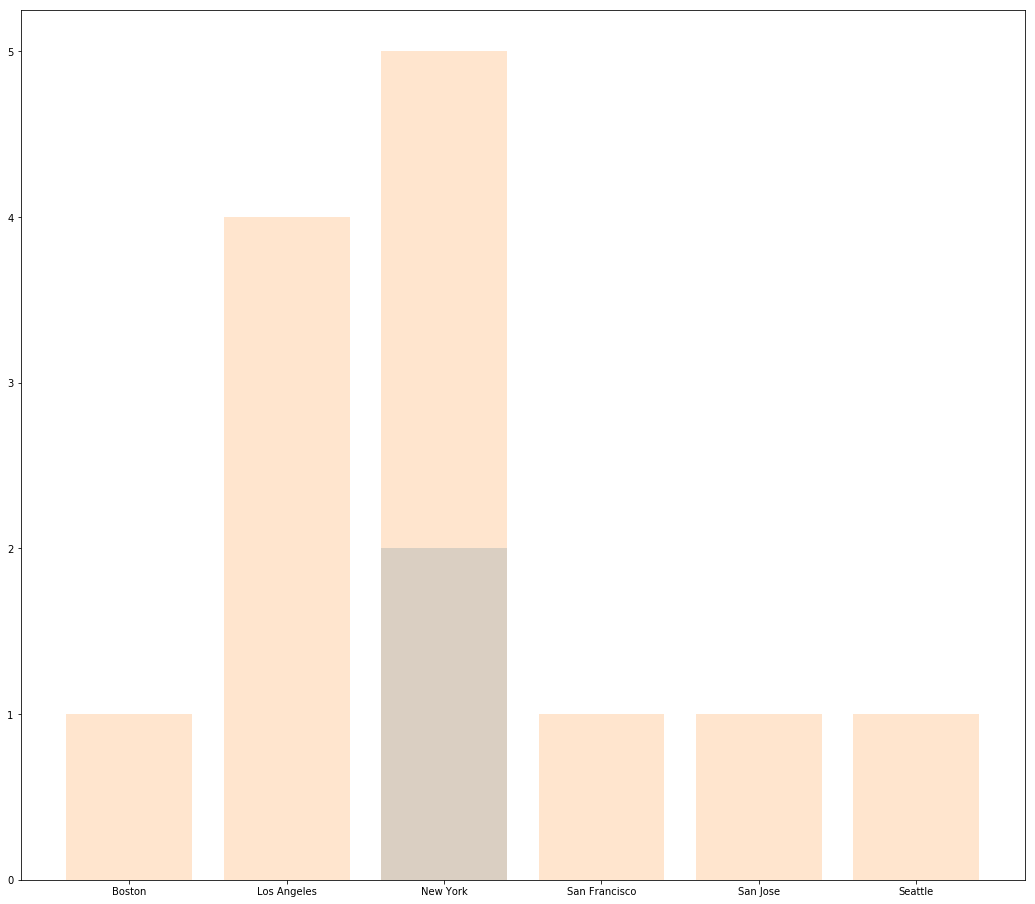

In [18]:
plt.figure(figsize=(18,16))
plt.bar(us_counts.index, us_counts['railroad'], alpha=0.2)
plt.bar(us_counts.index, us_counts['total_count'], alpha=0.2)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

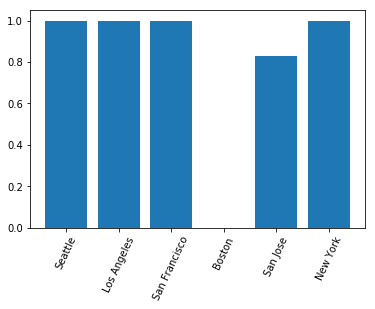

In [19]:
plt.bar(us_transit['city'], us_transit['tunnel_per_complete'])
plt.xticks(rotation=65)

In [20]:
us_transit.describe()

,id,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,local_cost,year,ppp_rate,cost_km_millions
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000
mean,7253.769231,0.153846,4.446154,0.910000,3.738462,2.692308,4377.769231,2018.230769,1.0,1211.469127
std,129.289825,0.375534,2.297686,0.277429,2.096242,1.750458,3120.721983,5.068758,0.0,1051.257619
min,7147.000000,0.000000,1.600000,0.000000,0.000000,0.000000,1670.000000,2011.000000,1.0,301.184211
25%,7154.000000,0.000000,2.700000,1.000000,2.700000,2.000000,2289.000000,2014.000000,1.0,566.451613
50%,7161.000000,0.000000,4.200000,1.000000,3.100000,3.000000,2800.000000,2018.000000,1.0,718.750000
75%,7409.000000,0.000000,5.300000,1.000000,5.100000,3.000000,6390.000000,2023.000000,1.0,1648.148148
max,7416.000000,1.000000,9.600000,1.000000,8.000000,7.000000,11000.000000,2026.000000,1.0,3928.571429


In [21]:
transit_cost.corr()

,id,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,local_cost,year,ppp_rate,cost_km_millions
id,1.000000,-0.128868,0.141488,0.069969,0.221007,0.052956,-0.074288,0.073418,0.223419,-0.145841
railroad,-0.128868,1.000000,-0.135740,0.050225,-0.118130,-0.190618,-0.031609,-0.050940,-0.018155,0.194335
length,0.141488,-0.135740,1.000000,-0.195408,0.752608,0.853289,-0.024549,0.038585,-0.131774,-0.110741
tunnel_per_complete,0.069969,0.050225,-0.195408,1.000000,0.300989,-0.216523,-0.051347,0.075812,0.127410,0.160618
tunnel_length_complete,0.221007,-0.118130,0.752608,0.300989,1.000000,0.588691,-0.035771,0.063372,-0.094853,-0.057945
stations,0.052956,-0.190618,0.853289,-0.216523,0.588691,1.000000,-0.002496,0.043930,-0.150629,-0.094321
local_cost,-0.074288,-0.031609,-0.024549,-0.051347,-0.035771,-0.002496,1.000000,0.098270,-0.106823,0.061521
year,0.073418,-0.050940,0.038585,0.075812,0.063372,0.043930,0.098270,1.000000,-0.005584,0.195709
ppp_rate,0.223419,-0.018155,-0.131774,0.127410,-0.094853,-0.150629,-0.106823,-0.005584,1.000000,0.025101
cost_km_millions,-0.145841,0.194335,-0.110741,0.160618,-0.057945,-0.094321,0.061521,0.195709,0.025101,1.000000


In [24]:
transit_cost.isnull()

,id,country,city,line,start_year,end_year,railroad,length,tunnel_per_complete,tunnel_length_complete,stations,source1,local_cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
534,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
535,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Set up X & Y Features

In [25]:
transit_cost.dtypes

id                        float64
country                    object
city                       object
line                       object
start_year                 object
end_year                   object
railroad                  float64
length                    float64
tunnel_per_complete       float64
tunnel_length_complete    float64
stations                  float64
source1                    object
local_cost                float64
currency                   object
year                      float64
ppp_rate                  float64
real_cost                  object
cost_km_millions          float64
source2                    object
reference                  object
dtype: object

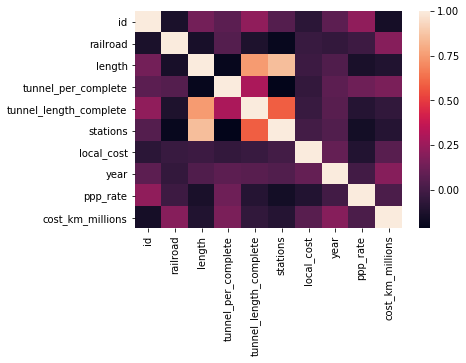

In [26]:
FEATURES = ['country', 'city', 'start_year', 'end_year', 'railroad',
       'length', 'tunnel_per_complete', 'tunnel_length_complete', 'stations',
       'year']
TARGET = ['cost_km_millions']
sns.heatmap(transit_cost.corr())

In [27]:
X_train, y_train, X_test, y_test = train_test_split(transit_cost[FEATURES], transit_cost[TARGET])